In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
df = pd.read_csv("cleaned_SFM_dataset_2019_2022.csv")

In [3]:
df['t_date'] = pd.to_datetime(df['transaction_date'], format="%d/%m/%Y") 
df['t_date'] = df['t_date'].dt.to_period('M').dt.start_time
df = df[df['t_date'] < '2022-01'] #3 full years of data

In [4]:
first_df = df[df['loyalty'] == 'First Time Buyer'].reset_index().copy() #Loyal customers only

In [5]:
department_revenue = first_df.groupby('department')['price'].sum().reset_index()
commodity_revenue = first_df.groupby('commodity')['price'].sum().reset_index()

# Sort values to get top categories
department_revenue = department_revenue.sort_values(by='price', ascending=False)
commodity_revenue = commodity_revenue.sort_values(by='price', ascending=False)

display(department_revenue.head(10).style.format({'price': '{:.2f}'}).hide(axis="index"))
display(commodity_revenue.head(10).style.format({'price': '{:.2f}'}).hide(axis="index"))

department,price
Grocery,849.91
Meat,692.59
Pharmaceutical,656.56
Produce,490.09
Pastry,192.02
Deli,171.91
Nutrition,124.81
Seafood,95.60
Floral,23.97
Cosmetics,18.26


commodity,price
Beef,222.31
Lunch meat,93.96
Chicken,79.81
Frozen meat,74.84
Pork,71.01
Cheese,69.83
Salad,66.77
Seafood-frozen,65.00
Meat - Other,64.90
Candy,64.11


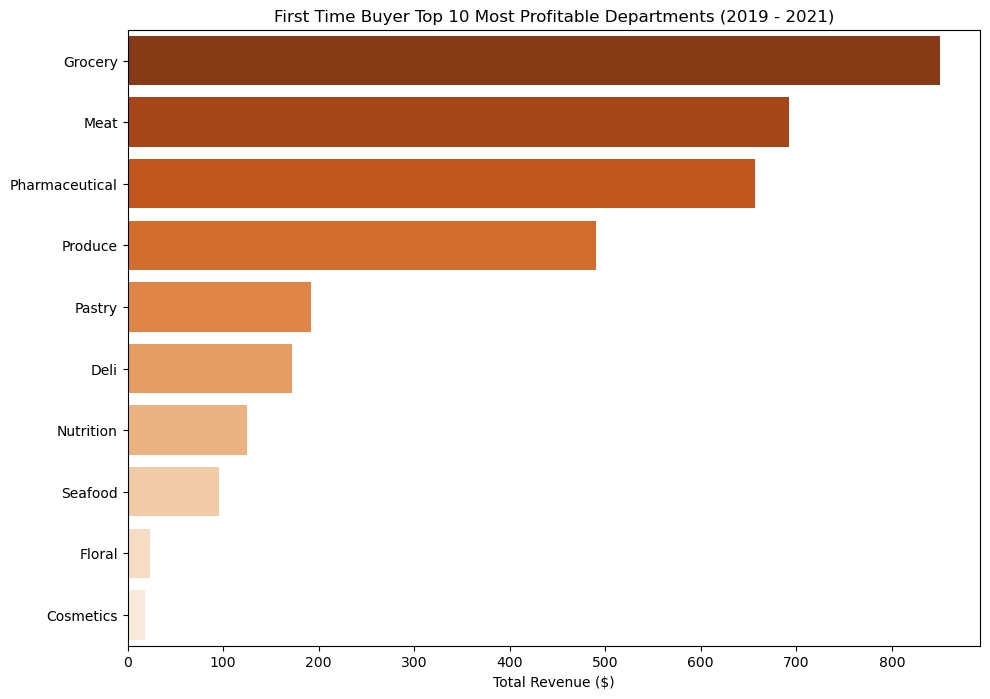

In [6]:
# Plot top 10 departments
plt.figure(figsize=(11, 8))
sns.barplot(data=department_revenue.head(10), y='department', x='price', palette='Oranges_r', hue='department', legend=False)
plt.title('First Time Buyer Top 10 Most Profitable Departments (2019 - 2021)')
plt.xlabel('Total Revenue ($)')
plt.ylabel('')

plt.savefig(f"Plots/{plt.gca().get_title()}.svg", format="svg", dpi=300, bbox_inches="tight")
plt.show();

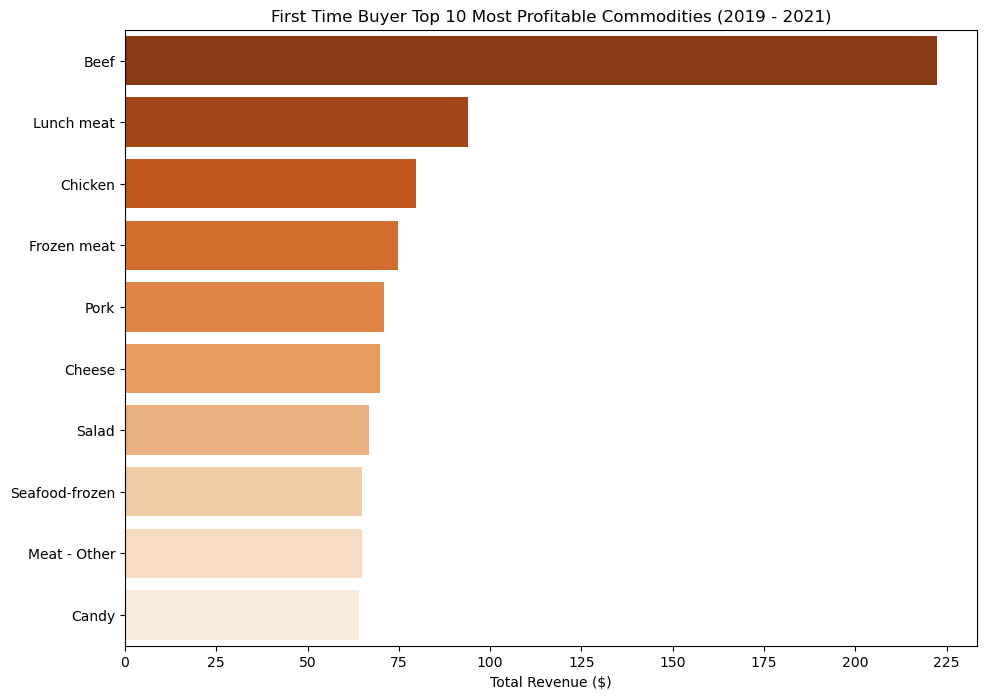

In [7]:
# Plot top 10 commodities
plt.figure(figsize=(11, 8))
sns.barplot(data=commodity_revenue.head(10), y='commodity', x='price', palette='Oranges_r', hue='commodity', legend=False)
plt.title('First Time Buyer Top 10 Most Profitable Commodities (2019 - 2021)')
plt.xlabel('Total Revenue ($)')
plt.ylabel('')
plt.xticks(ticks=range(0, int(commodity_revenue['price'].max()) + 25, 25))

plt.savefig(f"Plots/{plt.gca().get_title()}.svg", format="svg", dpi=300, bbox_inches="tight")
plt.show();